In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/youtubers_df.csv')

. **Data Exploration:**
- exploring the dataset to understand its structure and identify key
  variables.
- Checking for missing data and outliers

In [3]:
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


The dataset contains information about various YouTube channels, including their rank, username, categories, number of subscribers, country, visits, likes, comments, and links. The table provides a preview of the first few rows of the dataset.

In [4]:
df.info() # checking for the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [5]:
df.isnull().sum() # checking for null values

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

The dataset contains some null values in the "Categories" column. There are 306 null values in this column. The other columns do not have any null values.

To handle the null values in the "Categories" column we will replace them by mode ,i tried  to scrape the channel category from the web but unfortunately it didint worked .

In [6]:
# looks like there are null values in the categories lets go and fix them

print("The unique categories are : ")
df["Categories"].unique()

The unique categories are : 


array(['Música y baile', 'Videojuegos, Humor', 'Educación', nan,
       'Animación, Juguetes', 'Películas, Videojuegos', 'Juguetes',
       'Videojuegos', 'Películas, Animación', 'Películas',
       'Noticias y Política', 'Animación, Humor',
       'Música y baile, Animación', 'Música y baile, Películas',
       'Películas, Juguetes', 'Películas, Humor', 'Vlogs diarios',
       'Videojuegos, Juguetes', 'Animación, Videojuegos', 'Animación',
       'Música y baile, Humor', 'Diseño/arte, DIY y Life Hacks',
       'Ciencia y tecnología', 'Fitness, Salud y autoayuda',
       'Belleza, Moda', 'Humor', 'Comida y bebida', 'Deportes', 'Fitness',
       'Viajes, Espectáculos', 'Comida y bebida, Salud y autoayuda',
       'Diseño/arte', 'DIY y Life Hacks, Juguetes', 'Educación, Juguetes',
       'Juguetes, Coches y vehículos', 'Música y baile, Juguetes',
       'Animales y mascotas', 'ASMR', 'Moda', 'DIY y Life Hacks',
       'Diseño/arte, Belleza', 'Coches y vehículos',
       'Animación, Humor

In [7]:
df["Categories"]=df["Categories"].fillna(df["Categories"].mode()[0])

In [8]:
df.isnull().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

In [9]:
# Check for outliers in the numerical columns
outliers = df[['Suscribers', 'Visits', 'Likes', 'Comments']].describe()
print("the Detailed stats ....")
outliers

the Detailed stats ....


,Suscribers,Visits,Likes,Comments
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [10]:
import plotly.graph_objects as go

# Creating subplots for the boxplots of numerical columns
fig = go.Figure()

# Adding  boxplots to the subplots
fig.add_trace(go.Box(y=df['Suscribers'], name='Subscribers', boxmean=True))
fig.add_trace(go.Box(y=df['Visits'], name='Visits', boxmean=True))
fig.add_trace(go.Box(y=df['Likes'], name='Likes', boxmean=True))
fig.add_trace(go.Box(y=df['Comments'], name='Comments', boxmean=True))

# Updating layout and displaying the subplots
fig.update_layout(title='Boxplots for outlier detection', yaxis_title='Value', xaxis_title='Column', showlegend=True)
fig.update_layout(title_x=0.47)
fig.show()

- **Reasons for the existence of outliers in the dataset:**

- Subscribers: Outliers in the number of subscribers may exist due to
  exceptionally popular channels with a large and dedicated subscriber base. Viral content, celebrity endorsements, or unique niche content can lead to a significant increase in subscribers.
- Visits: Outliers in the number of visits may be attributed to viral videos,
  external traffic sources, or promotional campaigns that drive a surge in visits to specific videos or channels.
- Likes: Unusually high numbers of likes may be the result of viral     content,   controversial topics, or influencer endorsements that generate a
  large amount of engagement and positive feedback.
- Comments: Outliers in the number of comments may stem from highly engaging or
  controversial content that sparks extensive discussions and interactions among viewers

**Trend Analysis**
- Identifying trends among the top YouTube streamers. Which categories  
  are the most popular.
- correlation between the number of subscribers and the number of likes
  or comments.

In [11]:
# Calculating the total number of channels in each category
category_counts = df['Categories'].value_counts()
print("total number of channels in each category : ")
category_counts.head(10)

total number of channels in each category : 


Música y baile               466
Películas, Animación          61
Música y baile, Películas     41
Vlogs diarios                 37
Noticias y Política           36
Películas, Humor              34
Animación, Videojuegos        34
Animación, Juguetes           29
Animación, Humor              27
Películas                     24
Name: Categories, dtype: int64

In [12]:
# Get the top 10 categories
top_10_categories = df['Categories'].value_counts().nlargest(10)

# top 10 categories
fig = px.bar(x=top_10_categories.index, y=top_10_categories.values, title='Top 10 Categories', color=top_10_categories.values, labels={'x':'Category', 'y':'Number of Channels', 'color':'Number of Channels'})
fig.update_layout(title_x=0.47)
fig.show()

In [13]:
# Grouping by the most subscribed, visited, and liked YouTubers
most_subscribed = df.sort_values('Suscribers', ascending=False).head(10)
most_visited = df.sort_values('Visits', ascending=False).head(10)
most_liked = df.sort_values('Likes', ascending=False).head(10)
print("most_subscribed")
print(most_subscribed)
print()
print("most_visited")
print(most_visited)
print()
print("most liked")
print(most_liked)


most_subscribed
   Rank            Username              Categories   Suscribers  \
0     1             tseries          Música y baile  249500000.0   
1     2             MrBeast      Videojuegos, Humor  183500000.0   
2     3           CoComelon               Educación  165500000.0   
3     4            SETIndia          Música y baile  162600000.0   
4     5       KidsDianaShow     Animación, Juguetes  113500000.0   
5     6           PewDiePie  Películas, Videojuegos  111500000.0   
6     7  LikeNastyaofficial                Juguetes  107500000.0   
7     8         VladandNiki     Animación, Juguetes  101400000.0   
8     9     zeemusiccompany          Música y baile   99700000.0   
9    10                 WWE             Videojuegos   97200000.0   

          Country       Visits      Likes  Comments  \
0           India      86200.0     2700.0      78.0   
1  Estados Unidos  117400000.0  5300000.0   18500.0   
2         Unknown    7000000.0    24700.0       0.0   
3           Ind

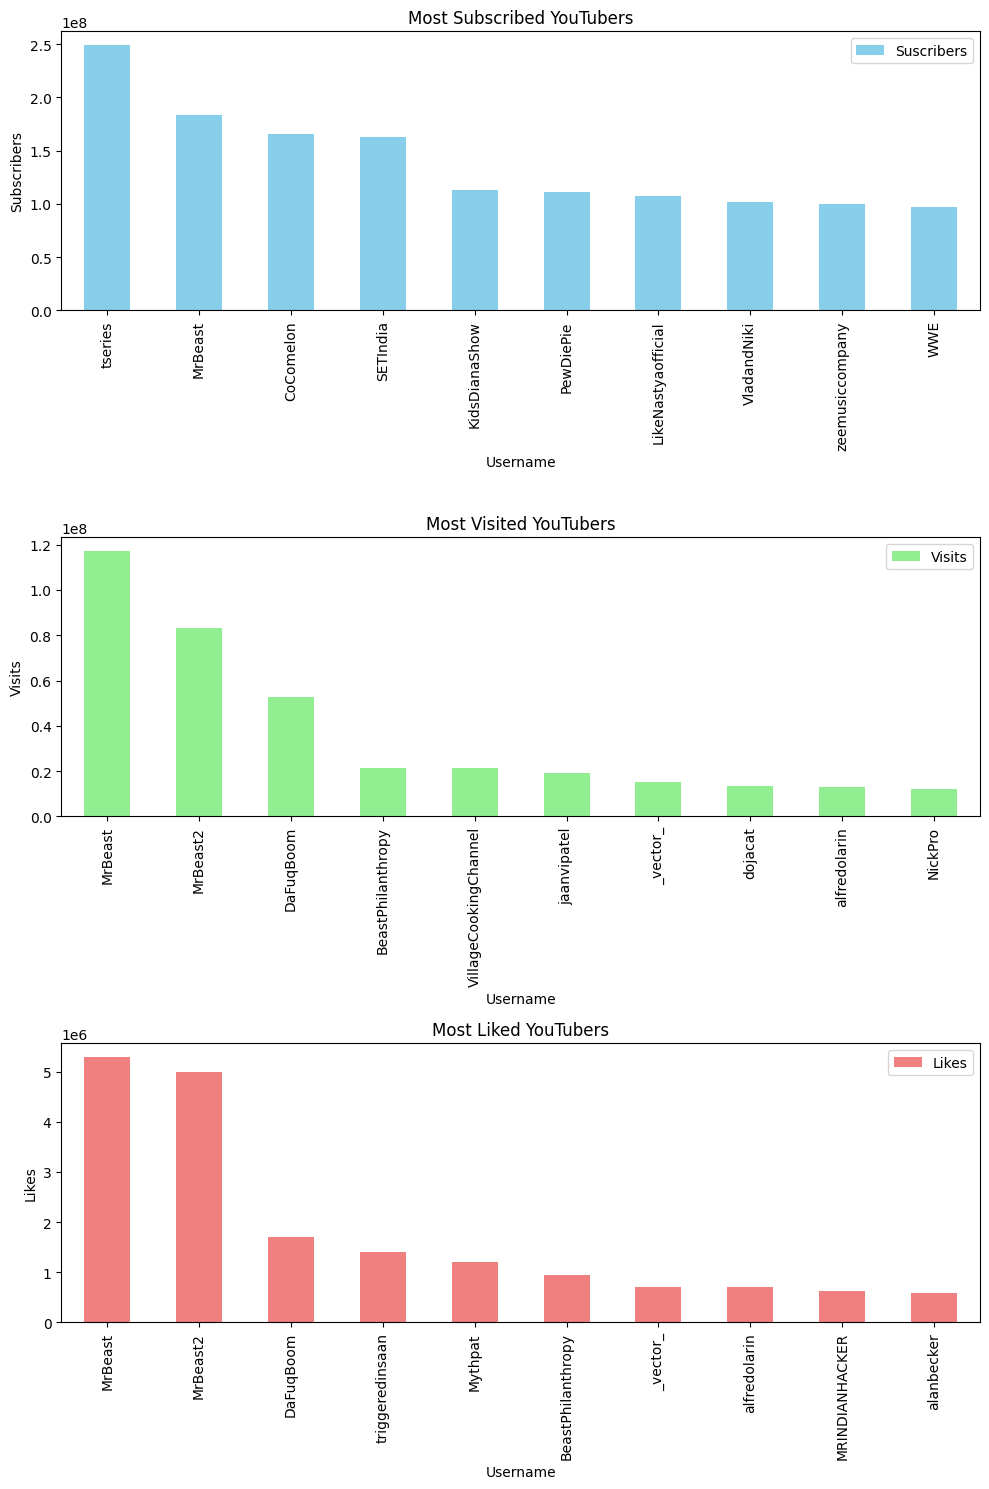

In [14]:
#bar charts for the most subscribed, visited, and liked YouTubers

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
most_subscribed.plot(kind='bar', x='Username', y='Suscribers', ax=axes[0], color='skyblue')
most_visited.plot(kind='bar', x='Username', y='Visits', ax=axes[1], color='lightgreen')
most_liked.plot(kind='bar', x='Username', y='Likes', ax=axes[2], color='lightcoral')

#titles and labels
axes[0].set_title('Most Subscribed YouTubers')
axes[0].set_ylabel('Subscribers')
axes[0].set_xlabel('Username')
axes[1].set_title('Most Visited YouTubers')
axes[1].set_ylabel('Visits')
axes[1].set_xlabel('Username')
axes[2].set_title('Most Liked YouTubers')
axes[2].set_ylabel('Likes')
axes[2].set_xlabel('Username')
plt.tight_layout()
plt.show()

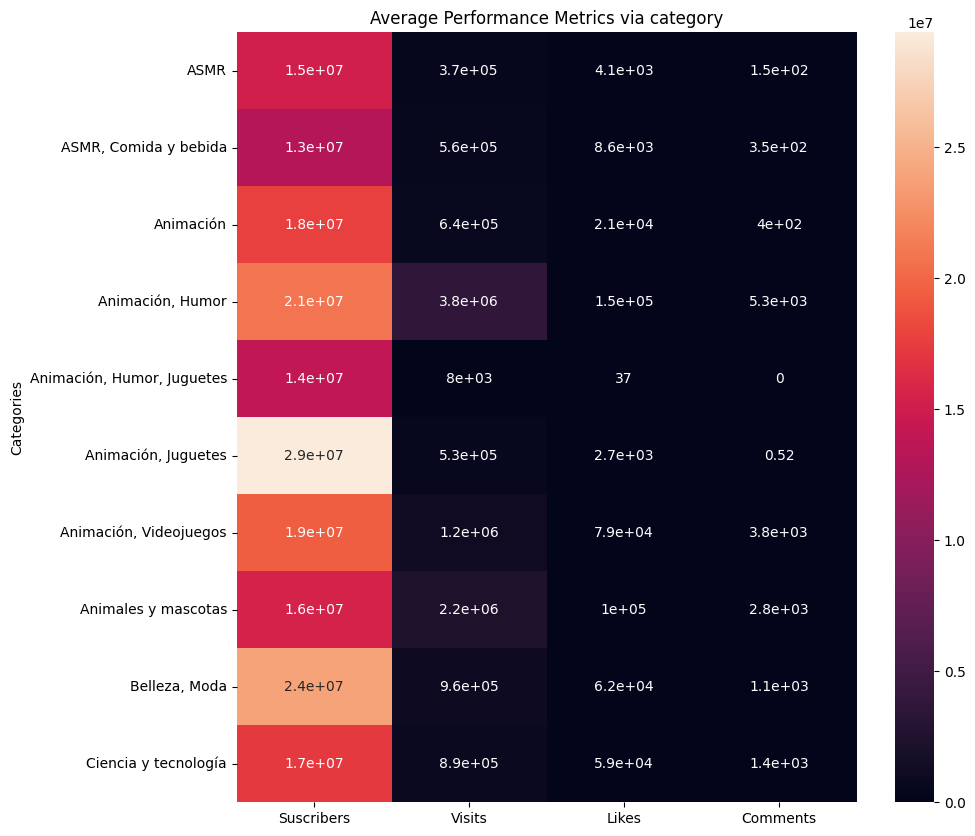

In [15]:
# Calculate the average performance metrics for each content category
plt.figure(figsize=(10,10))
average_metrics_by_category =df.groupby('Categories')[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()
sns.heatmap(average_metrics_by_category.head(10),annot=True)
plt.title("Average Performance Metrics via category")
plt.show()

- There are a select number of categories that are outperforming others
  significantly in terms of the average subscribers.
- Categories like Juguetes, Peliculas, Videojuegos and others show an
  exceptional performance in terms of subscribers only.
- None of the categories show much of an exceptional performance in either
  average visits, likes or comments.

In [16]:
# Calculating the correlation between subscribers, likes, and comments
correlation =df[['Suscribers', 'Likes', 'Comments']].corr()

# Display the correlation matrix
correlation

,Suscribers,Likes,Comments
Suscribers,1.000000,0.211639,0.036350
Likes,0.211639,1.000000,0.325911
Comments,0.036350,0.325911,1.000000


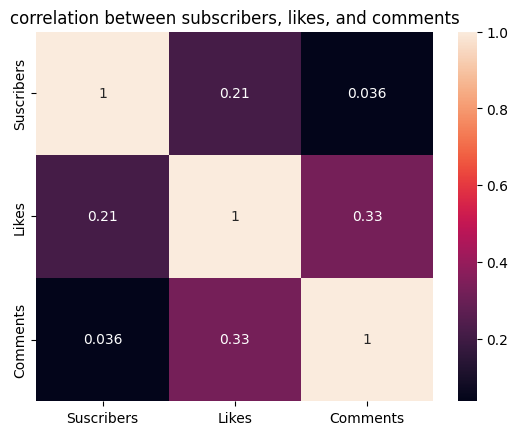

In [17]:
sns.heatmap(correlation,annot=True)
plt.title("correlation between subscribers, likes, and comments")
plt.show()

These values indicate the degree of linear relationship between the variables. For example, the correlation between likes and comments is 0.33, indicating a moderate positive correlation

In [18]:
df.drop(columns="Links",inplace=True)

**Audience Study:**
-  Analyze the distribution of streamers audiences by country. Are there
   regional preferences for
   specific content categories?

Text(0.5, 1.0, 'number of channels via country')

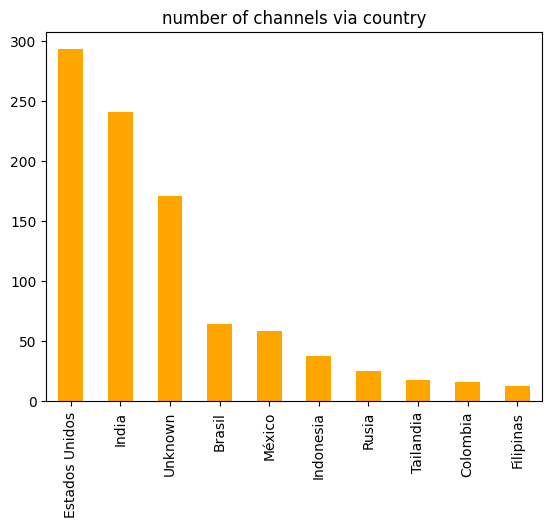

In [19]:
# most number of channels via country
df["Country"].value_counts().head(10).plot(kind="bar",color="orange")
plt.title("number of channels via country")

In [20]:
# Grouping by country and sum the visits, likes, and subscribers
by_country =df.groupby('Country').agg({'Visits': 'sum', 'Likes': 'sum', 'Suscribers': 'sum'}).reset_index()
print("country and sum the visits, likes, and subscribers :")
by_country


country and sum the visits, likes, and subscribers :


,Country,Visits,Likes,Suscribers
0,Arabia Saudita,4574500.0,116100.0,7.460000e+07
1,Argelia,524100.0,28800.0,3.150000e+07
2,Argentina,14474200.0,930853.0,1.241000e+08
3,Bangladesh,100700.0,1048.0,5.520000e+07
4,Brasil,26820400.0,1729333.0,1.246900e+09
5,Colombia,14566800.0,895029.0,3.354000e+08
6,Ecuador,34300.0,4300.0,2.680000e+07
7,Egipto,326100.0,7512.0,6.990000e+07
8,El Salvador,12900000.0,707600.0,2.190000e+07
9,España,2039900.0,122500.0,6.460000e+07


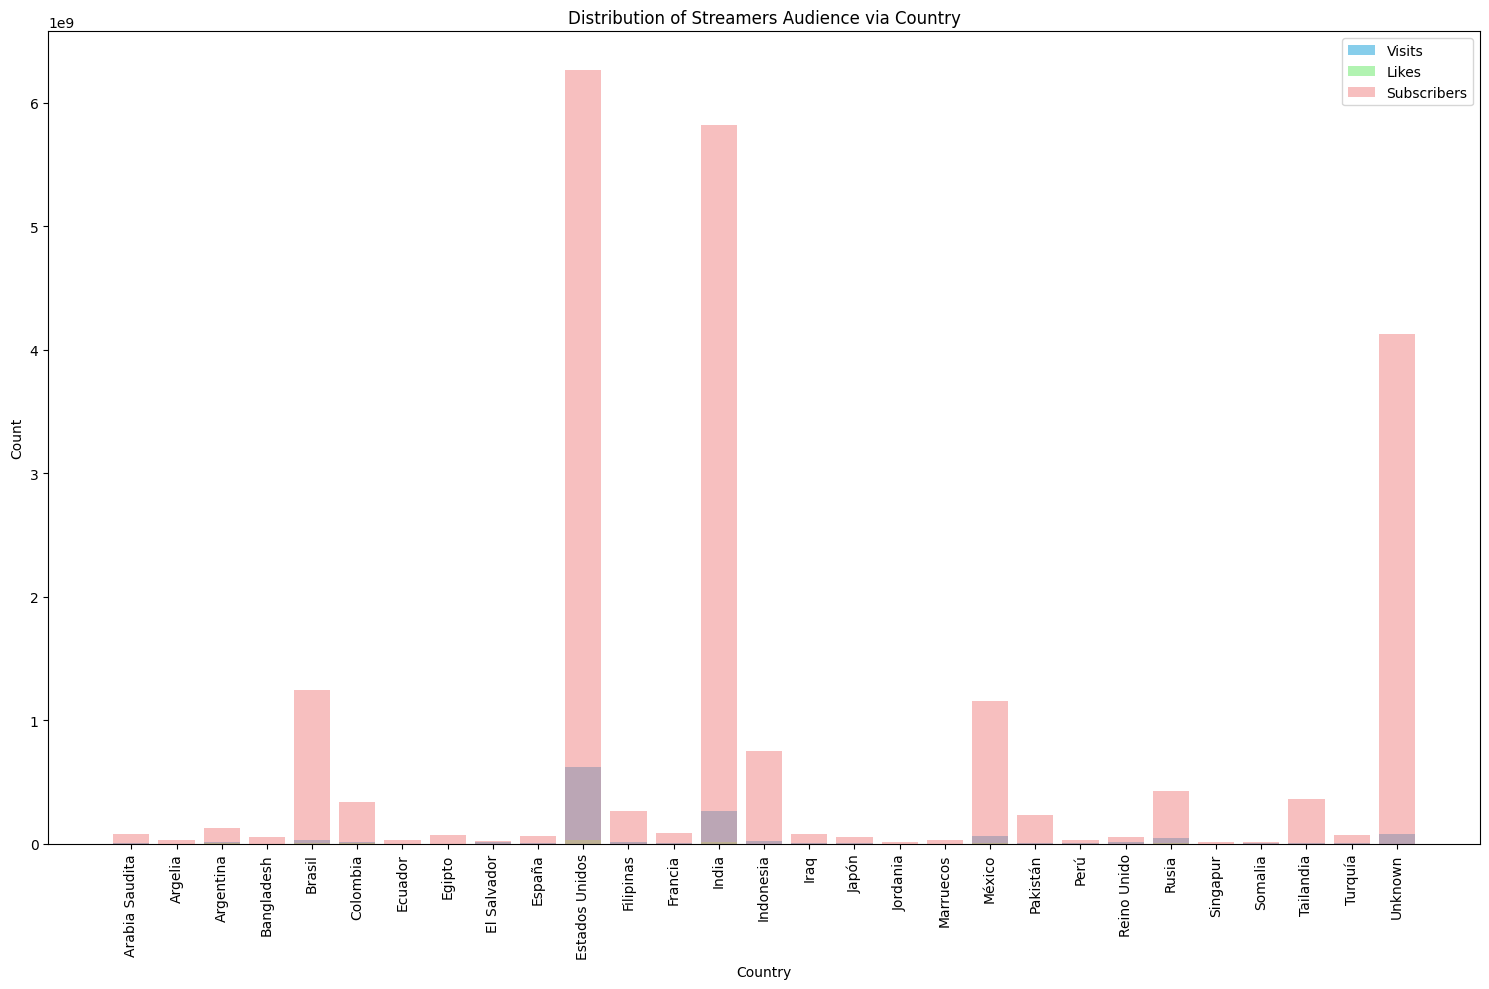

In [21]:

# Plotting the distribution of streamers' audience via country
plt.figure(figsize=(15, 10))
plt.bar(by_country['Country'], by_country['Visits'], color='skyblue', label='Visits')
plt.bar(by_country['Country'], by_country['Likes'], color='lightgreen', label='Likes', alpha=0.7)
plt.bar(by_country['Country'], by_country['Suscribers'], color='lightcoral', label='Subscribers', alpha=0.5)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Streamers Audience via Country')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

- The bar chart above provides a visual representation of the total visits,
  likes and subscribers for the top YouTube streamers in each country.
  The different colors represent the three metrics, allowing for a clear comparison of the audience distribution across countries.

In [22]:
# bar chart for subscriber count via country
fig = px.bar(by_country, x='Country', y='Suscribers', title='Subscriber Count via Country', labels={'Suscribers': 'Subscribers', 'Country': 'Country'})
fig.update_layout(title_x=0.47)
fig.show()

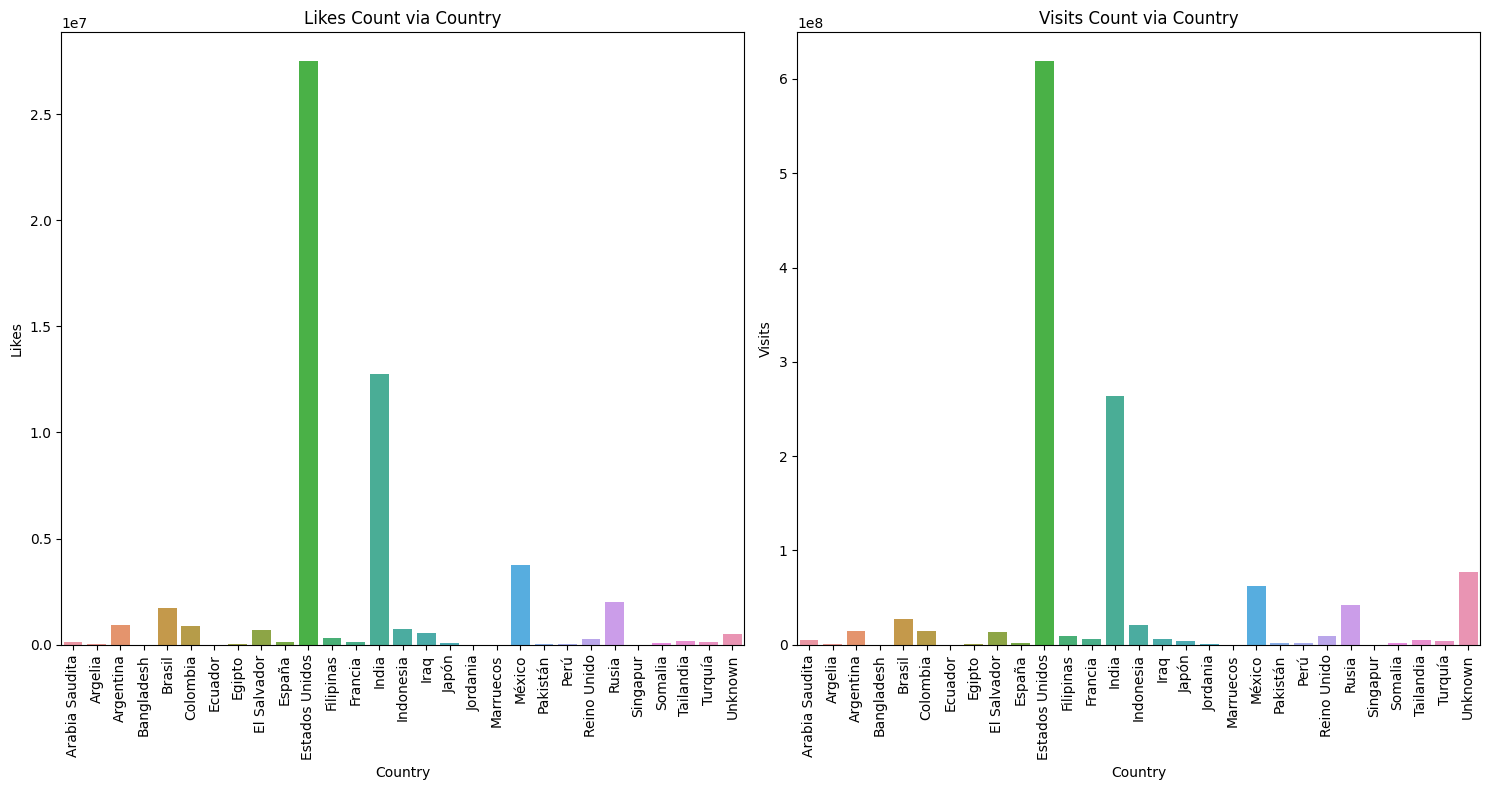

In [23]:

#subplots with actual count of likes and visits
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.barplot(x='Country', y='Likes', data=by_country, estimator=sum)
plt.title('Likes Count via Country')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x='Country', y='Visits', data=by_country, estimator=sum)
plt.title('Visits Count via Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [24]:
# most viewed categories via country
top_categories = df.groupby(['Country', 'Categories'])['Visits'].sum().reset_index()
top_categories = top_categories.sort_values(by='Visits', ascending=False)
top_categories.head(10)


,Country,Categories,Visits
86,India,Música y baile,196245755.5
72,Estados Unidos,"Videojuegos, Humor",159509700.0
62,Estados Unidos,Música y baile,131130660.0
73,Estados Unidos,Vlogs diarios,86443400.0
41,Estados Unidos,"Animación, Humor",75702600.0
48,Estados Unidos,Comida y bebida,30352400.0
121,México,Música y baile,28449000.0
43,Estados Unidos,"Animación, Videojuegos",27045700.0
96,India,Vlogs diarios,21498500.0
162,Unknown,"Animación, Juguetes",15209800.0


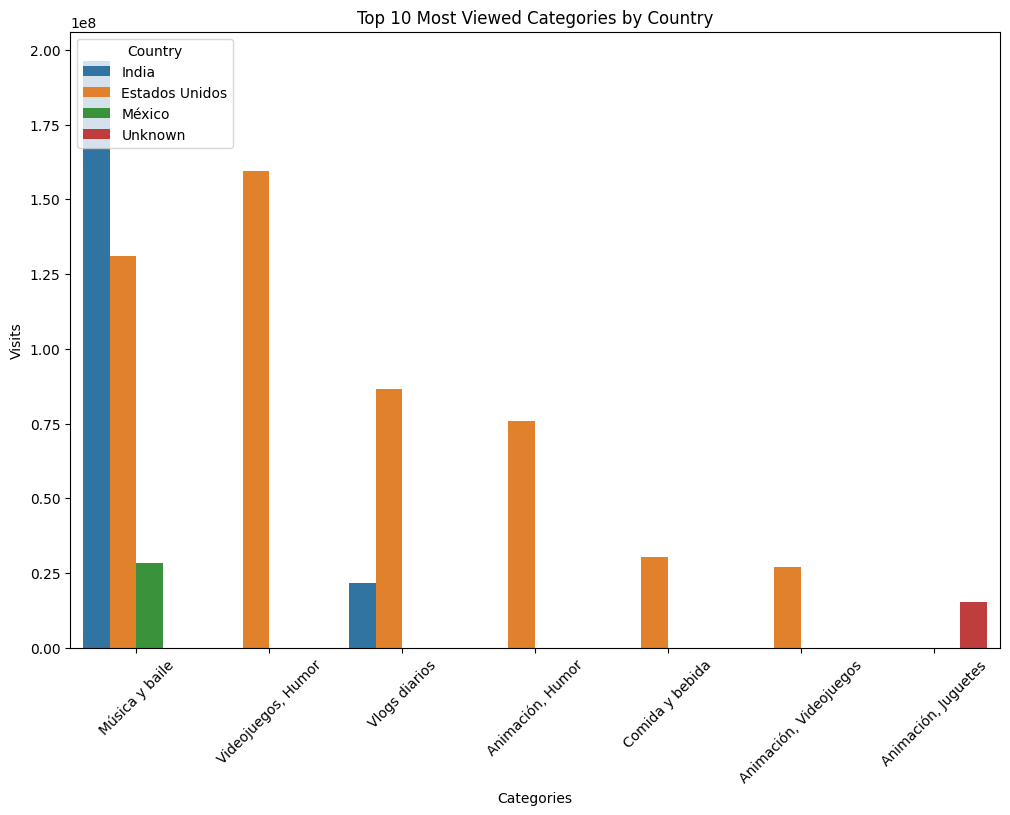

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Categories', y='Visits', hue='Country', data=top_categories.head(10))
plt.title('Top 10 Most Viewed Categories by Country')
plt.xticks(rotation=45)
plt.show()

**from the above observation we can see the most viewed content type via countries**

**Performance metrics**

-Calculate and visualize the average number of subscribers, visits,
 likes, and comments.

In [26]:
average_stats = df[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()
average_stats

Suscribers    2.189440e+07
Visits        1.209446e+06
Likes         5.363259e+04
Comments      1.288768e+03
dtype: float64

In [27]:
# Create the performance metric by finding the total mean of subscribers, visits, likes, and comments
df['Performance'] = df[['Subscribers', 'Visits', 'Likes', 'Comments']].mean(axis=1)


KeyError: "['Subscribers'] not in index"

In [ ]:

df.head()

In [ ]:
plt.figure(figsize=(8,8))
ax = average_stats.plot(kind='bar', color='skyblue')
plt.title('Average Statistics for YouTube Channels')
plt.ylabel('Average Value')
plt.xlabel('Metrics')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

The average number of subscribers, visits, likes, and comments for the YouTube channels in the dataset are as follows:

Average Subscribers: 21,894,400
Average Visits: 1,209,446
Average Likes: 53,632
Average Comments: 1,288

The average statistics for the YouTube channels show the following patterns and anomalies:

The average number of subscribers is significantly higher than the average number of visits, likes, and comments, indicating that there is a wide variation in the number of subscribers across the channels.

The average number of visits is relatively high, suggesting that the channels receive a substantial amount of traffic.

The average number of likes and comments is considerably lower than the average number of subscribers and visits, indicating that engagement (likes and comments) may be lower compared to the number of subscribers and visits.

**Content Categories**

- Explore the distribution of content categories. Which categories have the
  highest number of streamers?
- Are there specific categories with exceptional performance metrics

In [ ]:


# category and count the number of unique streamers
category_streamers = df.groupby('Categories')['Username'].nunique().sort_values(ascending=False)

# distribution of content categories
fig = px.bar(category_streamers.head(10), x=category_streamers.head(10).values, y=category_streamers.head(10).index, orientation='h',
             labels={'x':'Number of Streamers', 'y':'Categories'}, title='Top 10 Categories with the Highest Number of Streamers')
fig.show()

**Observation**
- The category "Música y baile" has the highest number of streamers, with a
  significant lead over the other categories in the top 10.
- The categories "Películas, Animación" and "Música y baile, Películas" also
  have a notable number of streamers, but they are considerably lower than "Música y baile."
- The number of streamers in the top categories decreases gradually, with a
  substantial drop after the top three categories

**Benchmarking:**
- Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
- Who are the top-performing content creators?

The streamers with above-average performance in terms of subscribers, visits, likes, and comments are as follows:

In [ ]:
# Calculate the average performance metrics
average_performance =df[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()

# Identify streamers with above-average performance
above_average_streamers = df[(df['Suscribers'] > average_performance['Suscribers']) &
                                      (df['Visits'] > average_performance['Visits']) &
                                      (df['Likes'] > average_performance['Likes']) &
                                      (df['Comments'] > average_performance['Comments'])]


**These streamers have demonstrated exceptional performance in terms of their subscriber count, visits, likes, and comments, positioning them above the average performance level**.

In [ ]:
above_average_streamers.head()

In [ ]:

import squarify
# Creating a treemap visualization of the top-performing content creators
plt.figure(figsize=(12, 8))
sizes = above_average_streamers['Suscribers'].head(10)
label = above_average_streamers['Username'].head(10)
colors = plt.cm.viridis(np.linspace(0, 1, len(label)))
squarify.plot(sizes=sizes, label=label, color=colors, alpha=0.6)
plt.axis('off')
plt.title('Treemap of Top-Performing Content Creators')
plt.show()

The treemap for the top performing content creators visualizes the distribution of subscribers across different content categories for the top performing creators. Each rectangle in the treemap represents a content creator, and the size of the rectangle corresponds to the number of subscribers. The treemap is organized hierarchically, with the rectangles nested within each other to represent the categories and subcategories of content.

The treemap provides a visual representation of the top performing content creators and their respective subscriber counts, allowing for a quick and intuitive comparison of their performance within different content categories.

**Brands and Collaborations:**
- Analyze whether streamers with high performance metrics receive more brand collaborations and
marketing campaigns.


-  We have not been provided the data for brand collabs and other but i tried
   using the variuos platorms like influence and platforms like social blade but i was unable to find that out hence , i have listed below some things we can do when the data is provided.

 - To analyze whether streamers with high performance metrics receive more  
   brand collaborations and marketing campaigns, we can follow these steps:

- Calculate the correlation between performance metrics (subscribers, visits,
  likes, comments) and the number of brand collaborations and marketing
  campaigns.
- Visualize the relationship between performance metrics and brand
  collaborations
  using scatter plots or heatmaps.
- Identify streamers with high performance metrics and examine their history of
  brand collaborations and marketing campaigns.




**Content Recommendations:**
- Propose a system for enhancing content recommendations to YouTube users based
  on streamers categories and performance metrics

In [ ]:
df

In [ ]:
# importing libraries
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
# fit and transform data using label encoder -- category names are replaced with numerical values
df['Category_Encoded'] = label_encoder.fit_transform(df['Categories'])

In [ ]:
# creating a unique user-categoty matrix -- identifying unique users and categories in our dataset
unique_users = df['Username'].unique()
unique_category = df['Category_Encoded'].unique()

# creating a dataframe with the above
user_category_df = pd.DataFrame(index = unique_users, columns = unique_category)

# populating the dataframe with the performance metric
# this loop goes through each row in the dataframe and fills in the user-category with the corresponding performance matrix
for index, row in df.iterrows():
    user = row['Username']
    category = row['Category_Encoded']
    performance_metrics = row['Performance']

    user_category_df.at[user, category] = performance_metrics

# filling in missing values where there are NaN
user_category_df = user_category_df.fillna(0)

In [ ]:
user_category_df

I'm using a similarity metric to measure how similar one content creator is to another. The similarity matrix will help me to identify users with similar behaviours in terms of category interactions.
This will then help me make recommendations based on the perefernces and activities of similar users.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# calculating the cosine similarity in our data
# this matrix will contain a pair-wise cosine similarity between each pair of users
similarity_matrix = cosine_similarity(user_category_df)

# converting it to a dataframe
similarity_df = pd.DataFrame(similarity_matrix, index=user_category_df.index, columns=user_category_df.index)
# observing our data
similarity_df.head()

interpretation of values above
- a similarity value of 1 indicates that two users are identical in their
  interactions with categories.
- a similarity value of 0 means that there is no similarity
- negative values indicate a disimilarity

In [ ]:
# choosing a target category - selecting a category for which I want to make recommendation
target_category = 'ASMR'

# finding catgories that are similar to my chosen category
target_category_data = df[df['Categories']== target_category][['Performance']]

In [ ]:
similarity_scores = df.apply(lambda x: cosine_similarity([target_category_data.iloc[0]], [x[['Performance']]]).flatten()[0],axis=1)
df['similarity score'] = similarity_scores

# identifying unseen categories -- finding categories that a user has not interacted with yet
unseen_categories = df[df['Categories'] != target_category]

# calculating weigthed recommendation-- this is based on the similarity with the target category
weighted_recommendation = pd.Series(index=unseen_categories.index, dtype=float)

for index, row in unseen_categories.iterrows():
    weighted_recommendation.loc[index] = row['similarity score']

# sorting and recommend -- sorting the data based on their scores and then recommending top categories to users
top_recommendation = weighted_recommendation.sort_values(ascending=False).head(10)

# presenting recommendation -- these are the categories that aare similar to the target category based on performance metrics
recommended_categories = df.loc[top_recommendation.index, 'Categories'].unique().tolist()

print(f"Your likings {target_category}")
print()
print("Suggestions based on content similarity")
print("-----------------------")

for cat in recommended_categories:
  print(cat)

In [ ]:
df["Categories"].unique()